In [1]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
dataset = pd.read_csv("dataset/dataset.csv")
y = dataset['36']
X = dataset.drop(columns=['36'])
def remap_labels(labels):
    remap_dict = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 7: 5}
    return [remap_dict[label] for label in labels]

remapped_labels = remap_labels(y.values)

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)

In [4]:
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(np.array(remapped_labels).reshape(-1, 1))

C:\Users\pars iran\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [13]:
som_30x30 = MiniSom(30, 30, X_train.shape[1], sigma=2, learning_rate=0.1, neighborhood_function='gaussian', topology='rectangular', activation_distance='euclidean', random_seed=42)
som_30x30.train_batch(X_train, 1000)

In [20]:
def voting_approach(som, dim, X, y):
    winner_map_voting = np.zeros(dim, dtype=int)
    for i, x in enumerate(X):
        win = som.winner(x)
        lable = np.argmax(y[i])
        winner_map_voting[win[0], win[1], lable] += 1

    labels_voting = np.argmax(winner_map_voting, axis=2)
    plt.figure(figsize=(5, 4))
    plt.pcolor(labels_voting.T, cmap='viridis')
    plt.colorbar()
    plt.title('Winner Map - Voting Approach')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

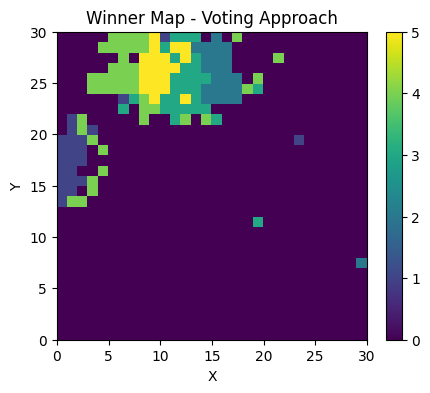

In [21]:
dim = (30, 30, y_train.shape[1])
voting_approach(som_30x30, dim, X_train, y_train)

In [29]:
def Kmean_approach(som, y):
    weights = som.get_weights()
    num_neurons = weights.shape[0] * weights.shape[1]
    flattened_weights = weights.reshape((num_neurons, -1))
    n_clusters = y_train.shape[1]
    kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init = 10)
    kmeans.fit(flattened_weights)
    neuron_labels = kmeans.labels_
    labels_grid = neuron_labels.reshape(weights.shape[0], weights.shape[1])
    plt.figure(figsize=(5, 4))
    plt.pcolor(labels_grid.T, cmap='viridis')
    plt.colorbar()
    plt.title('SOM Neuron Labels - K-means Approach')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

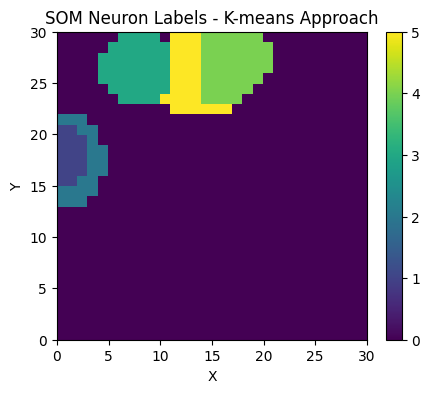

In [30]:
Kmean_approach(som_30x30, y_train)

In [24]:
som_20x20 = MiniSom(20, 20, X_train.shape[1], sigma=2, learning_rate=0.1, neighborhood_function='gaussian', topology='rectangular', activation_distance='euclidean', random_seed=42)
som_20x20.train_batch(X_train, 1000)

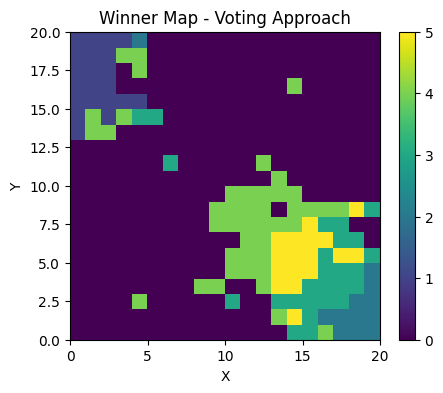

In [25]:
dim = (20, 20, y_train.shape[1])
voting_approach(som_20x20, dim, X_train, y_train)

C:\Users\pars iran\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


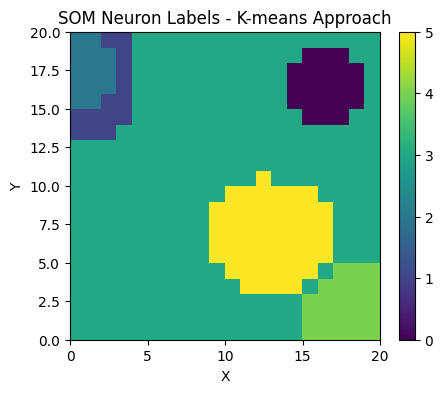

In [31]:
Kmean_approach(som_20x20, y_train)

In [32]:
from sklearn.metrics import davies_bouldin_score, normalized_mutual_info_score

winning_neurons = np.array([som_30x30.winner(x) for x in X_test])
winning_indices = winning_neurons[:, 0] * weights.shape[1] + winning_neurons[:, 1]

y_pred_kmeans = neuron_labels[winning_indices]

db_index_kmeans = davies_bouldin_score(np.argmax(y_test, axis=1).reshape(-1, 1), y_pred_kmeans)
nmi_kmeans = normalized_mutual_info_score(np.argmax(y_test, axis=1), y_pred_kmeans)

print("K-means Approach Evaluation on Test Set:")
print(f"Davies-Bouldin Index: {db_index_kmeans}")
print(f"Normalized Mutual Information: {nmi_kmeans}")


K-means Approach Evaluation on Test Set:
Davies-Bouldin Index: 6.4138549445494455
Normalized Mutual Information: 0.5186969399611492
